### Applying Naive Bayes

1.1 Loading Data

In [1]:
import pandas as pd
#TO read the file saved as .csv
data = pd.read_csv('preprocessed_data.csv')
count1, count2 = data['project_is_approved'].value_counts()
percentage1 = (count1/(count1+count2))*100
print("The data points with class label as 1 are: ", round(percentage1, 2),"%")

The data points with class label as 1 are:  84.86 %


1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [2]:
#seperating the class label from the dataframe
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

#Splittind the data into train and test using train test split method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=5, stratify=y)

1.3 Make Data Model Ready: encoding text features

__Using Bag of Words__

In [3]:
#Converting text features into numerical features using Bag of Words method
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=100,max_features=10000,ngram_range=(1,2))
vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

#To get feature names
feature_names = []
feature_names.extend(vectorizer.get_feature_names())

print("After Uing BOW on 'essay' data")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_train.shape)

#https://stackoverflow.com/questions/44193154/notfittederror-tfidfvectorizer-vocabulary-wasnt-fitted/44194026

After Uing BOW on 'essay' data
(73196, 10000) (73196,)
(36052, 10000) (73196,)


__Using TFIDF vectorizer__

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(min_df=100,max_features=10000,ngram_range=(1,3))
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_train.shape)

(73196, 10000) (73196,)
(36052, 10000) (73196,)


__Observation:__ We tried changing the max feature values from 5000, 10000, 15000, 20000 and noticed that there is no improvment in the test auc value. So, we decided to train our model with 5000 features only.

1.4 Make Data Model Ready: encoding categorical features

In [5]:
#Converting Categorical Features into Numerical features using one hot encoding(ohe)

#Converting School State
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
feature_names.extend(vectorizer.get_feature_names())

X_train_sch_st_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_sch_st_ohe = vectorizer.transform(X_test['school_state'].values)

print("School State")
print(X_train_sch_st_ohe.shape, y_train.shape)
print(X_test_sch_st_ohe.shape, y_test.shape)
print("="*50)

#Converting Teacher Prefix
vectorizer.fit(X_train['teacher_prefix'].values)
feature_names.extend(vectorizer.get_feature_names())

X_train_teach_prefx_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teach_prefx_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("Teacher Prefix")
print(X_train_teach_prefx_ohe.shape, y_train.shape)
print(X_test_teach_prefx_ohe.shape, y_test.shape)
print("="*50)

#Converting Project Grade Category
vectorizer.fit(X_train['project_grade_category'].values)
feature_names.extend(vectorizer.get_feature_names())

X_train_proj_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_proj_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("Project Grade Category")
print(X_train_proj_grade_ohe.shape, y_train.shape)
print(X_test_proj_grade_ohe.shape, y_test.shape)
print("="*50)

#Converting Clean Categories
vectorizer.fit(X_train['clean_categories'].values)
feature_names.extend(vectorizer.get_feature_names())

X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("Clean Categories")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print("="*50)

#Converting Clean Sub Categories
vectorizer.fit(X_train['clean_subcategories'].values)
feature_names.extend(vectorizer.get_feature_names())

X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("clean Subcategories")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print("="*50)

School State
(73196, 51) (73196,)
(36052, 51) (36052,)
Teacher Prefix
(73196, 5) (73196,)
(36052, 5) (36052,)
Project Grade Category
(73196, 4) (73196,)
(36052, 4) (36052,)
Clean Categories
(73196, 9) (73196,)
(36052, 9) (36052,)
clean Subcategories
(73196, 30) (73196,)
(36052, 30) (36052,)


1.5 Make Data Model Ready: encoding Numerical Features

In [6]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

#Normalizing Price Feature
X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1)).T
X_test_price_norm = normalizer.fit_transform(X_test['price'].values.reshape(1,-1)).T
feature_names.append('price')

print("Price")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*50)

#Normalizing Previously submitted projects by the teacher feature.
X_train_teacher_prev_sub_project_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
X_test_teacher_prev_sub_project_norm = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
feature_names.append('price')

print("teacher_number_of_previously_posted_projects")
print(X_train_teacher_prev_sub_project_norm.shape, y_train.shape)
print(X_test_teacher_prev_sub_project_norm.shape, y_test.shape)
print("="*50)

Price
(73196, 1) (73196,)
(36052, 1) (36052,)
teacher_number_of_previously_posted_projects
(73196, 1) (73196,)
(36052, 1) (36052,)


1.6 Concatinating all the features

__for Bag of Words__

In [7]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_sch_st_ohe, X_train_teach_prefx_ohe, X_train_proj_grade_ohe, X_train_clean_cat_ohe, X_train_clean_subcat_ohe, X_train_price_norm, X_train_teacher_prev_sub_project_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_sch_st_ohe, X_test_teach_prefx_ohe, X_test_proj_grade_ohe, X_test_clean_cat_ohe, X_test_clean_subcat_ohe, X_test_price_norm, X_test_teacher_prev_sub_project_norm)).tocsr()

__for TFIDF__

In [8]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_sch_st_ohe, X_train_teach_prefx_ohe, X_train_proj_grade_ohe, X_train_clean_cat_ohe, X_train_clean_subcat_ohe, X_train_price_norm, X_train_teacher_prev_sub_project_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_sch_st_ohe, X_test_teach_prefx_ohe, X_test_proj_grade_ohe, X_test_clean_cat_ohe, X_test_clean_subcat_ohe, X_test_price_norm, X_test_teacher_prev_sub_project_norm)).tocsr()

1.7 Appling NB on different kind of featurization as mentioned in the instructions

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

A) Using Bag of Words


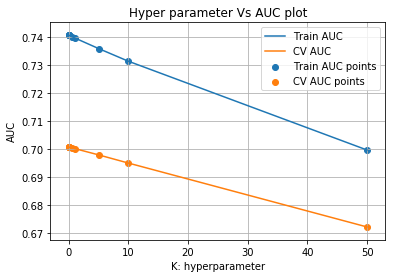

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.166162,0.065023,0.009463,0.004478,0.0005,{'alpha': 0.0005},0.707753,0.696792,0.699153,0.686935,...,0.740559,0.742194,0.742238,0.741325,0.740845,0.738853,0.739973,0.740503,0.740700,0.000988
4,0.232007,0.027035,0.016389,0.003522,0.001,{'alpha': 0.001},0.707752,0.696792,0.699153,0.686935,...,0.740558,0.742194,0.742236,0.741325,0.740844,0.738853,0.739973,0.740502,0.740699,0.000988
3,0.244273,0.036057,0.017491,0.006691,0.005,{'alpha': 0.005},0.707745,0.696787,0.699151,0.686935,...,0.740554,0.742190,0.742228,0.741321,0.740840,0.738849,0.739969,0.740498,0.740695,0.000987
8,0.253967,0.007606,0.017553,0.003657,0.01,{'alpha': 0.01},0.707744,0.696783,0.699150,0.686933,...,0.740549,0.742185,0.742221,0.741316,0.740835,0.738844,0.739964,0.740493,0.740690,0.000987
5,0.251283,0.028462,0.016197,0.005188,0.05,{'alpha': 0.05},0.707720,0.696750,0.699135,0.686916,...,0.740510,0.742146,0.742174,0.741276,0.740796,0.738804,0.739926,0.740454,0.740650,0.000986


In [10]:
#Hyperparameter Tuning
classifier = MultinomialNB(fit_prior=False, class_prior=[0.85,0.15])
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = RandomizedSearchCV(classifier, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [11]:
#Choosing the best hyperparameter from above results
best_alpha = results[results['rank_test_score']==results['rank_test_score'].min()]['param_alpha'].item()
print("The best Hyperparameter alpha value is:",best_alpha)

The best Hyperparameter alpha value is: 0.005


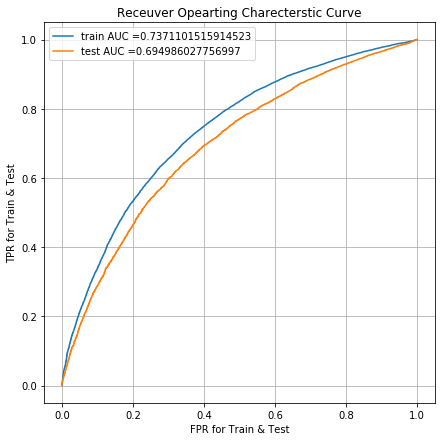

In [16]:
#Training the model using best hyperparameter
classifier = MultinomialNB(alpha=best_alpha)
clf = classifier.fit(X_tr, y_train)

#Checking the performance of the model on test data using AUC as our metric
y_train_pred = clf.predict_proba(X_tr)[:,1]
y_test_pred = clf.predict_proba(X_te)[:,1]

#getting feature log probabilities
feature_log_prob = abs(list(clf.feature_log_prob_)[1])

#getting tpr, fpr, thresholds using roc curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR for Train & Test")
plt.ylabel("TPR for Train & Test")
plt.title("Receuver Opearting Charecterstic Curve")
plt.grid()
plt.show()

In [17]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("="*100)
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.4607199910329829 for threshold 0.734


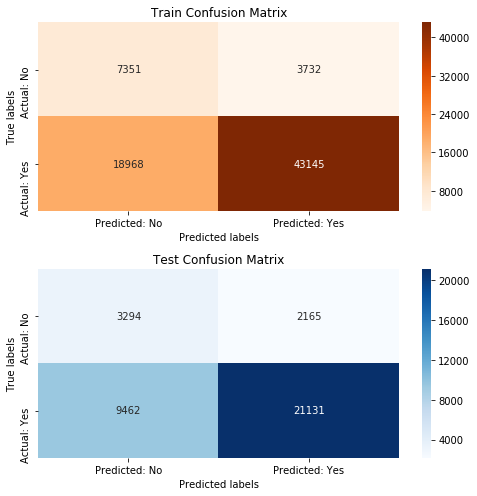

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://stackoverflow.com/questions/56478320/how-to-create-multiple-seaborn-heatmaps-with-a-shared-legend-in-one-figure
fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

B)Using TFIDF


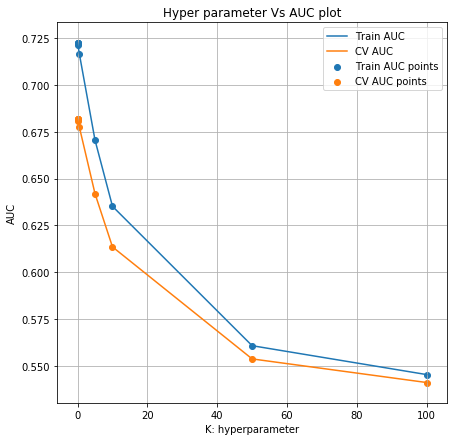

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.259199,0.052941,0.013714,0.002246,1e-05,{'alpha': 1e-05},0.690381,0.673355,0.675701,0.672649,...,0.722536,0.724696,0.723574,0.723213,0.722048,0.719802,0.722665,0.722012,0.722517,0.001199
0,0.233248,0.072505,0.012292,0.008125,0.0001,{'alpha': 0.0001},0.690380,0.673353,0.675700,0.672649,...,0.722534,0.724695,0.723573,0.723212,0.722047,0.719801,0.722663,0.722010,0.722516,0.001199
8,0.257911,0.004684,0.016438,0.004042,0.0005,{'alpha': 0.0005},0.690376,0.673349,0.675700,0.672645,...,0.722529,0.724690,0.723568,0.723207,0.722042,0.719797,0.722659,0.722006,0.722511,0.001199
4,0.243915,0.016767,0.014460,0.001259,0.005,{'alpha': 0.005},0.690334,0.673316,0.675665,0.672605,...,0.722474,0.724635,0.723509,0.723151,0.721988,0.719743,0.722605,0.721951,0.722456,0.001199
6,0.236303,0.025922,0.015835,0.003886,0.1,{'alpha': 0.1},0.689599,0.672404,0.674888,0.671795,...,0.721306,0.723488,0.722294,0.721986,0.720847,0.718602,0.721459,0.720792,0.721299,0.001190


In [19]:
#Hyperparameter Tuning
classifier = MultinomialNB(fit_prior=False, class_prior=[0.84,0.15])
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf_tfidf = RandomizedSearchCV(classifier, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf_tfidf.fit(X_tr_tfidf, y_train)

results = pd.DataFrame.from_dict(clf_tfidf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [20]:
#Choosing the best hyperparameter from above results
best_alpha_tfidf = results[results['rank_test_score']==results['rank_test_score'].min()]['param_alpha'].item()
print("The best Hyperparameter alpha value is:",best_alpha)

The best Hyperparameter alpha value is: 0.005


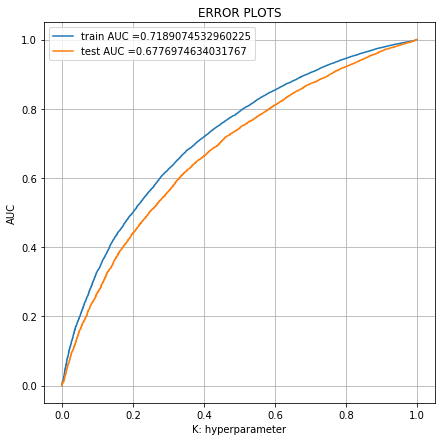

In [26]:
#Training the model using best hyperparameter
classifier = MultinomialNB(alpha=best_alpha)
clf_tfidf = classifier.fit(X_tr_tfidf, y_train)

#Checking the performance of the model on test data using AUC as our metric
y_train_pred_tfidf = clf_tfidf.predict_proba(X_tr_tfidf)[:,1]
y_test_pred_tfidf = clf_tfidf.predict_proba(X_te_tfidf)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

#Plotting the ROC curve 
plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.3100982824946483 for threshold 0.875


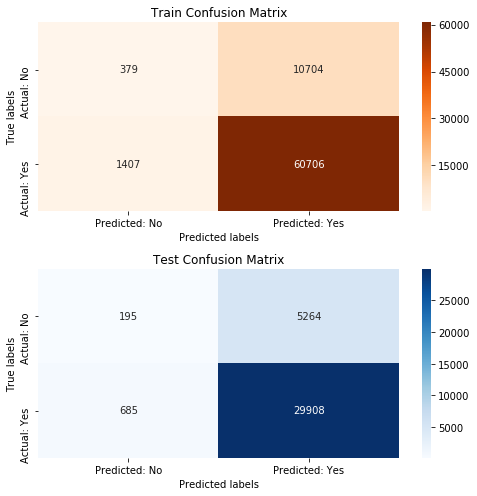

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
best_t_tfidf = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)

train_confusion_matrix_tfidf = confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_t))
test_confusion_matrix_tfidf = confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t))

#https://stackoverflow.com/questions/56478320/how-to-create-multiple-seaborn-heatmaps-with-a-shared-legend-in-one-figure
fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix_tfidf, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix_tfidf, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

1.8 Feature Selection using BOW:

In [24]:
#Getting top 20 features for interpretability
feature_index = sorted(range(len(feature_log_prob)), key=lambda i: feature_log_prob[i])[-20:]
for idx in feature_index:
    print(feature_names[idx],":",feature_log_prob[idx])
    print("-"*50)

success they : 11.376135360309483
--------------------------------------------------
with supplies : 11.376135360309483
--------------------------------------------------
price : 11.381005850652102
--------------------------------------------------
activities used : 11.383355347631344
--------------------------------------------------
fun ways : 11.383355347631344
--------------------------------------------------
items make : 11.383355347631344
--------------------------------------------------
playground equipment : 11.383355347631344
--------------------------------------------------
grow nannan : 11.390627842503733
--------------------------------------------------
higher academic : 11.390627842503733
--------------------------------------------------
better oxygen : 11.405333449226635
--------------------------------------------------
improve school : 11.405333449226635
--------------------------------------------------
materials learn : 11.405333449226635
------------------------

<h1>3. Summary</h1>

In [25]:
from prettytable import PrettyTable

summary = PrettyTable()
summary.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
summary.add_row(["BOW", "MultinomialNB()", best_alpha, round(best_t,3)])
summary.add_row(["TFIDF", "MultinomialNB()", best_alpha_tfidf, round(best_t_tfidf,3)])
print(summary)

+------------+-----------------+-----------------+-------+
| Vectorizer |      Model      | Hyper Parameter |  AUC  |
+------------+-----------------+-----------------+-------+
|    BOW     | MultinomialNB() |      0.005      | 0.734 |
|   TFIDF    | MultinomialNB() |      1e-05      | 0.875 |
+------------+-----------------+-----------------+-------+
